# Lab: Linear Regression
Basically running it here as an extra file for my own sake, as with the other labs.

## Goal:
Use linear regression with one variable to predict restaurant franchise profits.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *
import copy
import math

%matplotlib inline

In [9]:
# Yay premade data.
# Single feature is city population (10,000s)
# Target is target profitability ($10,000s)

x_train, y_train = load_data()

# Checking out the data
print(f"Data type (x): {type(x_train)}")
print(f"Data sample:\n{x_train[:5]}")

print(f"\nData type (y): {type(y_train)}")
print(f"Target sample:\n{y_train[:5]}")

if x_train.shape == y_train.shape: # Only because we know x only has 1 feature
    print(f"\nm = {len(x_train)}")
else:
    print("There is a dataset mismatch...")

Data type (x): <class 'numpy.ndarray'>
Data sample:
[6.1101 5.5277 8.5186 7.0032 5.8598]

Data type (y): <class 'numpy.ndarray'>
Target sample:
[17.592   9.1302 13.662  11.854   6.8233]

m = 97


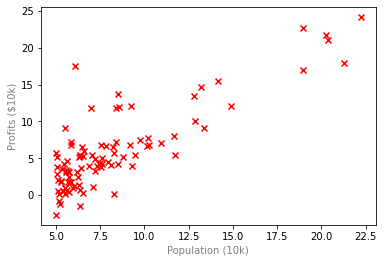

In [12]:
# Visualize it for an intuitive understanding
# Only 2 properties, the input and output features, so single scatter is enough
plt.scatter(x_train, y_train, marker='x', c='r')
plt.ylabel("Profits ($10k)", c='gray')
plt.xlabel("Population (10k)", c='gray')
plt.show()

In [24]:
def compute_cost(x, y, w, b):
    # Pred = wx+b
    # cost = (pred - y) ** 2
    # total_cost = sum(costs)
    m = len(y)
    predictions = np.dot(x, w) + b
    costs = (predictions - y) ** 2
    total_cost = np.sum(costs) / (2 * m)
    
    return total_cost

In [25]:
# Test, expect ~75.2
w, b = 2, 1
cost = compute_cost(x_train, y_train, w, b)
print(cost, type(cost))

75.20338497891959 <class 'numpy.float64'>


In [26]:
def compute_gradient(x, y, w, b):
    m = len(y)
    predictions = np.dot(x, w) + b
    err = predictions - y
    dj_dw = np.sum(err * x) / m
    dj_db = np.sum(err) / m
    
    return dj_dw, dj_db

In [29]:
# Test, expect ~-65,33, -5.84
w, b = 0, 0
dj_dw, dj_db = compute_gradient(x_train, y_train, w, b)
print(f"Gradient: {dj_dw, dj_db}")

# Test on non-zero, expect ~-47.42, -4.01
w, b = 0.2, 0.2
dj_dw, dj_db = compute_gradient(x_train, y_train, w, b)
print(f"\nGradient: {dj_dw, dj_db}")

Gradient: (-65.32884974555671, -5.839135051546393)

Gradient: (-47.41610118114433, -4.007175051546392)


In [39]:
def gradient_descent(x, y, w, b, cost_fn=compute_cost, 
                     grad_fn=compute_gradient, alpha=1e-2, num_iters=1000):
    m = len(y)
    J_hist = []
    w_hist = []
    
    for i in range(num_iters):
        dj_dw, dj_db = grad_fn(x, y, w, b)
        
        w -= alpha * dj_dw
        b -= alpha * dj_db
        
        cost = cost_fn(x, y, w, b)
        J_hist.append(cost)
        
        if (i % 10 == 0) or (num_iters <= 10):
            w_hist.append(w)
            print(f"Iter: {i:2d}\tCost: {J_hist[-1]}")
    
    return w, b, J_hist, w_hist

In [42]:
w, b = 0, 0
w, b, _, _ = gradient_descent(x_train, y_train, w, b, num_iters=1500)

print(f"\nFinal w: {w}\tb: {b}")

Iter:  0	Cost: 6.737190464870007
Iter: 10	Cost: 5.859827889932181
Iter: 20	Cost: 5.810817842627869
Iter: 30	Cost: 5.76354476854712
Iter: 40	Cost: 5.717947107333528
Iter: 50	Cost: 5.673965480401506
Iter: 60	Cost: 5.631542613611772
Iter: 70	Cost: 5.590623262687323
Iter: 80	Cost: 5.551154141272754
Iter: 90	Cost: 5.513083851543225
Iter: 100	Cost: 5.476362817272741
Iter: 110	Cost: 5.440943219274565
Iter: 120	Cost: 5.406778933129694
Iter: 130	Cost: 5.373825469122317
Iter: 140	Cost: 5.342039914304029
Iter: 150	Cost: 5.311380876611354
Iter: 160	Cost: 5.281808430963811
Iter: 170	Cost: 5.253284067272322
Iter: 180	Cost: 5.225770640290271
Iter: 190	Cost: 5.199232321241896
Iter: 200	Cost: 5.173634551165021
Iter: 210	Cost: 5.148943995907395
Iter: 220	Cost: 5.12512850271798
Iter: 230	Cost: 5.102157058376736
Iter: 240	Cost: 5.079999748808297
Iter: 250	Cost: 5.05862772012701
Iter: 260	Cost: 5.038013141062576
Iter: 270	Cost: 5.018129166717367
Iter: 280	Cost: 4.998949903608226
Iter: 290	Cost: 4.980450375

In [45]:
m = len(y_train)
predictions = np.dot(x_train, w) + b

Text(0.5, 0, 'Population (10k)')

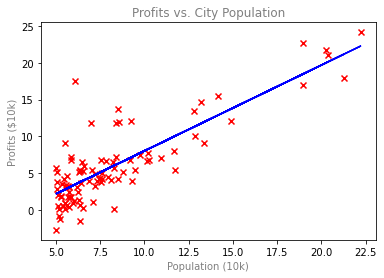

In [46]:
plt.plot(x_train, predictions, c='b')
plt.scatter(x_train, y_train, marker='x', c='r')

plt.title("Profits vs. City Population", c='gray')
plt.ylabel("Profits ($10k)", c='gray')
plt.xlabel("Population (10k)", c="gray")


In [48]:
predict_1 = 3.5 * w + b # City of population 35,000
predict_2 = 7.0 * w + b
print(f"\n{predict_1}\n{predict_2}")


0.45197678677017716
4.534245012944714
